# Определение перспективного тарифа для телеком компании
******


# Описание проекта

Вы аналитик компании **«Мегалайн»** — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: **«Смарт»** и **«Ультра»**. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- Минута разговора: 3 рубля
- Сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- Минута разговора: 1 рубль
- Сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Обратите внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.



-----
# ВЫПОЛНЕНИЕ ПРОЕКТА

## Шаг 1. Откроем файл с данными и изучим общую информацию

Импортируем библиотеку **`pandas`**, и создадим датафреймы по названиям файлов и содержащейся в них информации.  
Просмотрим таблицы и информацию о них.

In [1]:
import pandas as pd
df_users = pd.read_csv('/datasets/users.csv')
display(df_users)
print(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
display(df_calls)
print(df_calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [3]:
df_messages = pd.read_csv('/datasets/messages.csv')
display(df_messages)
print(df_messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [4]:
df_internet = pd.read_csv('/datasets/internet.csv')
display(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Обнаружен неопознанный столбец `'Unnamed: 0'`. Вероятно, это слобец с индексами. Проверим его на наличие дубликатов и проверим его тип данных в информации о датафрейме.

In [5]:
print(df_internet['Unnamed: 0'].duplicated().sum())
print(df_internet.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


Тип данных `int64`, столбец содержит только цифры - удалим его, чтобы не мешал.

In [6]:
df_internet.drop(columns=['Unnamed: 0'], inplace=True)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(df_tariffs)
print(df_tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Сразу проверим датафреймы на наличие дубликатов. Сомневаюсь, что они будут, но всё же.

In [8]:
dfs = [df_users, df_calls, df_messages, df_internet]
for df in dfs:
    print('Дубликатов в таблице', df.duplicated().sum())

Дубликатов в таблице 0
Дубликатов в таблице 0
Дубликатов в таблице 0
Дубликатов в таблице 0


***
Выявленные недостатки в данных:
- **users** - пропущены значения в столбце `churn_date` (те, кто пока пользуется текущим тарифом);

- **users** - неверный формат данных в столбцах `churn_date` и `reg_date` (дата сохранена как строка);

- **calls** - неверный формат данных в столбце `call_date` (дата сохранена как строка);

- **messages** - неверный формат данных в столбце `message_date` (дата сохранена как строка);

- **internet** - неверный формат данных в столбце `session_date` (дата сохранена как строка);

- **calls** - много нулевых значений в столбце `duration` (вероятно, пропущенные звонки).

Также стоит округлить вверх все значения израсходованного траффика для каждой сессии пользователя (до мегабайт) и длительности каждого вызова (до минут).

-------
## Шаг 2. Подготовка данных

Начнём с округления минут и мегабайт.  
Сначала, удалим строки с нулевыми значениями в столбце `df_calls['duration']`. Они ни на что не влияют, но искажают общую картину длительности звонков, так как расход минут не происходит, но множество записей с нулем смещает медианное и среднее значения.  
Сначала узнаем сколько их вообще, и посмотрим как они влияют на распределение.

In [9]:
print('Количество пропущенных вызовов', len(df_calls[df_calls['duration'] == 0]))
print('Процентное соотношение {:.2%}'.format(len(df_calls[df_calls['duration'] == 0])/len(df_calls)))

Количество пропущенных вызовов 39613
Процентное соотношение 19.55%


Не мало, однако. Взглянем как они влияют на распределение.

In [10]:
df_calls['duration'].hist()

Да, картина искажается. Избавимся от вредных записей.

In [11]:
df_calls = df_calls.query('duration > 0.00')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null object
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Успешно отобрали значения, превышающие **0**.

In [12]:
df_calls['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

Проверили как изменились значения столбца - всё верно, нулей нет.

Для округления значений в большую сторону, импортируем библиотеку `numpy`. Нам поможет метод округления **ceil**.

In [13]:
import numpy as np
df_calls.loc[:,'duration'] = np.ceil(df_calls.loc[:,'duration']).astype('int64')
print(df_calls.loc[:,'duration'].describe())
print(df_calls.info())

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null object
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.2+ MB
None


Дробей нет - всё хорошо. Преобразуем числа из `float` в `int64`.

In [14]:
df_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Аналогично с траффиком - удалим нулевые сессии. Не вижу смысла в их наличии.  
Но сначала, проверим их количсетво и распределение.

In [15]:
print('Количество нулевых интернет-сессий', len(df_internet[df_internet['mb_used'] == 0]))
print('Процентное соотношение {:.2%}'.format(len(df_internet[df_internet['mb_used'] == 0])/len(df_internet)))

Количество нулевых интернет-сессий 19598
Процентное соотношение 13.12%


Тоже не мало. А что с распределением?

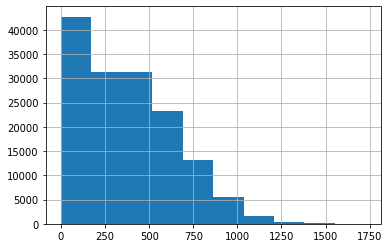

In [16]:
df_internet['mb_used'].hist()

И тут нули влияют на картину. Пора избавляться от них.

In [17]:
df_internet = df_internet.query('mb_used > 0')
df_internet['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

Округлим значения вверх.

In [18]:
df_internet.loc[:,'mb_used'] = np.ceil(df_internet.loc[:,'mb_used']).astype('int64')
print(df_internet['mb_used'].describe())
print(df_internet.info())

count    129798.000000
mean        426.581758
std         255.596114
min           1.000000
25%         228.000000
50%         401.000000
75%         593.000000
max        1725.000000
Name: mb_used, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null object
user_id         129798 non-null int64
dtypes: int64(2), object(2)
memory usage: 5.0+ MB
None


Думаю, стоит удалить столбцы с id сессии для интернета, звонков и смс, т.к. эти данные нам ни о чём полезном не говорят. id пользователя и так стоит в каждой записи, и мы можем отследить количество отправленных им сообщений, сделанных звонков и интернет-сессий.

In [19]:
df_internet = df_internet.drop(columns=['id'])
df_calls = df_calls.drop(columns=['id'])
df_messages = df_messages.drop(columns=['id'])

Теперь приведём даты к нужному формату во всех столбцах.

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
print(df_internet.info())
print(df_calls.info())
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 3 columns):
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 3 columns):
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB
None


Отлично.  
Теперь приведём в порядок столбцы с датами в таблице **users**

In [21]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d', errors='coerce')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В столбце `churn_date` большинство значений пропущены. Мы установили параметр **errors** как **'coerce'** чтобы пропуски заменились на `NaT` и остались пропусками.  
Для работы нам необходимы помесячные значения, поэтому в отдельном столбце запишем данные о месяце в котором была активность пользователя.

In [22]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

Методом сводных таблиц, получим сгруппированную информацию о пользователях по месяцам.

In [23]:
df_calls_pivot = df_calls.pivot_table(values='duration', index=['user_id', 'month'], aggfunc={'sum', 'count'})
df_messages_pivot = df_messages.pivot_table(values='message_date', index=['user_id', 'month'], aggfunc='count')
df_internet_pivot = df_internet.pivot_table(values='mb_used', index=['user_id', 'month'], aggfunc='sum')

Теперь, таблицы одного размера и с ними проще работать. Объединим их используя метод `merge`. На соответствие проверяем по индексам.

In [24]:
df_all = pd.merge(df_calls_pivot, df_messages_pivot, left_index=True, right_index=True, how='outer')
df_all = pd.merge(df_all, df_internet_pivot, left_index=True, right_index=True, how='outer')
display(df_all)

count    sum  message_date  mb_used
user_id month                                     
1000    5       17.0  159.0          22.0   2256.0
        6       28.0  172.0          60.0  23257.0
        7       41.0  340.0          75.0  14016.0
        8       42.0  408.0          81.0  14070.0
        9       46.0  466.0          57.0  14581.0
...              ...    ...           ...      ...
1498    10      30.0  247.0          42.0  20604.0
1499    9        8.0   70.0          11.0   1848.0
        10      44.0  449.0          48.0  17809.0
        11      62.0  612.0          59.0  17984.0
        12      56.0  492.0          66.0  13077.0

[3214 rows x 4 columns]

Переименуем некоторые столбцы.

In [25]:
df_all.rename(columns={'count': 'number_calls', 'sum': 'minutes_used', 'message_date': 'sms_used', 
                       'mb_used': 'traffic_used'}, inplace=True)
display(df_all)

number_calls  minutes_used  sms_used  traffic_used
user_id month                                                    
1000    5              17.0         159.0      22.0        2256.0
        6              28.0         172.0      60.0       23257.0
        7              41.0         340.0      75.0       14016.0
        8              42.0         408.0      81.0       14070.0
        9              46.0         466.0      57.0       14581.0
...                     ...           ...       ...           ...
1498    10             30.0         247.0      42.0       20604.0
1499    9               8.0          70.0      11.0        1848.0
        10             44.0         449.0      48.0       17809.0
        11             62.0         612.0      59.0       17984.0
        12             56.0         492.0      66.0       13077.0

[3214 rows x 4 columns]

In [26]:
df_all.index

MultiIndex([(1000,  5),
            (1000,  6),
            (1000,  7),
            (1000,  8),
            (1000,  9),
            (1000, 10),
            (1000, 11),
            (1000, 12),
            (1001, 11),
            (1001, 12),
            ...
            (1497, 11),
            (1497, 12),
            (1498,  7),
            (1498,  8),
            (1498,  9),
            (1498, 10),
            (1499,  9),
            (1499, 10),
            (1499, 11),
            (1499, 12)],
           names=['user_id', 'month'], length=3214)

Слишком сложно получилось...  
Работа с мультииндексом неудобная. Агрегированные данные мы уже получили, теперь вернём столбец `user_id` и месяц.

In [27]:
df_all.reset_index(inplace=True)
print(df_all.info())
display(df_all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id         3214 non-null int64
month           3214 non-null int64
number_calls    3168 non-null float64
minutes_used    3168 non-null float64
sms_used        2717 non-null float64
traffic_used    3201 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB
None


,user_id,month,number_calls,minutes_used,sms_used,traffic_used
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0
3210,1499,9,8.0,70.0,11.0,1848.0
3211,1499,10,44.0,449.0,48.0,17809.0
3212,1499,11,62.0,612.0,59.0,17984.0


Отлично. Переименуем столбец `tariff_name` в таблице **df_tariffs**, и объединим по нему таблицу с **df_users**.

In [28]:
df_tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)
df_users_tariffs = pd.merge(df_users, df_tariffs, on='tariff', how='left')
print(df_users_tariffs.info())
display(df_users_tariffs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
user_id                  500 non-null int64
age                      500 non-null int64
churn_date               38 non-null datetime64[ns]
city                     500 non-null object
first_name               500 non-null object
last_name                500 non-null object
reg_date                 500 non-null datetime64[ns]
tariff                   500 non-null object
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 non-null int64
rub_monthly_fee          500 non-null int64
rub_per_gb               500 non-null int64
rub_per_message          500 non-null int64
rub_per_minute           500 non-null int64
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 62.5+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


Значения заполнены, осталось последнее объединение и нормальное название датафрейма.

In [29]:
df = pd.merge(df_all, df_users_tariffs, on='user_id', how='left')
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
number_calls             3168 non-null float64
minutes_used             3168 non-null float64
sms_used                 2717 non-null float64
traffic_used             3201 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

,user_id,month,number_calls,minutes_used,sms_used,traffic_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


Для удобства, переименуем некоторые столбцы.

In [30]:
df.rename(columns={'messages_included':'sms_included', 'mb_per_month_included':'traffic_included', 
                   'rub_per_message':'rub_per_sms', 'rub_monthly_fee':'monthly_fee'}, inplace=True)

Посчитаем излишки услуг, потраченные пользователями вне "пакетов".

In [31]:
df['over_sms'] = df['sms_used'] - df['sms_included']
df['over_mb'] = df['traffic_used'] - df['traffic_included']
df['over_minutes'] = df['minutes_used'] - df['minutes_included']
display(df)
print(df.info())

,user_id,month,number_calls,minutes_used,sms_used,traffic_used,age,churn_date,city,first_name,...,sms_included,traffic_included,minutes_included,monthly_fee,rub_per_gb,rub_per_sms,rub_per_minute,over_sms,over_mb,over_minutes
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-978.0,-28464.0,-2841.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-940.0,-7463.0,-2828.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-925.0,-16704.0,-2660.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-919.0,-16650.0,-2592.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,-943.0,-16139.0,-2534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,50,15360,500,550,200,3,3,-8.0,5244.0,-253.0
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,-39.0,-13512.0,-430.0
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,-2.0,2449.0,-51.0
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,...,50,15360,500,550,200,3,3,9.0,2624.0,112.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 23 columns):
user_id             3214 non-null int64
month               3214 non-null int64
number_calls        3168 non-null float64
minutes_used        3168 non-null float64
sms_used            2717 non-null float64
traffic_used        3201 non-null float64
age                 3214 non-null int64
churn_date          187 non-null datetime64[ns]
city                3214 non-null object
first_name          3214 non-null object
last_name           3214 non-null object
reg_date            3214 non-null datetime64[ns]
tariff              3214 non-null object
sms_included        3214 non-null int64
traffic_included    3214 non-null int64
minutes_included    3214 non-null int64
monthly_fee         3214 non-null int64
rub_per_gb          3214 non-null int64
rub_per_sms         3214 non-null int64
rub_per_minute      3214 non-null int64
over_sms            2717 non-null float64
over_mb             32

Теперь опишем функцию одной строки, которая проверит наличие излишка и посчитает его стоимость.  
Опишем 3 функции. Если разница между потраченным "количеством услуги" и включённым в тариф положительная, то производится расчёт стоимости. Если она меньше или равна нулю, возвращаем ноль. Для траффика прийдется перевести данные в Гигабайты, делением на 1024 и округлением вверх, т.к. траффик  докупается только Гигабайтами.

In [32]:
def rub_traffic(row):
    if row['over_mb'] > 0:
        a = (np.ceil(row['over_mb']/1024)).astype('int64') * row['rub_per_gb']
        return a
    else:
        return 0


def rub_sms(row):
    if row['over_sms'] > 0:
        a = row['over_sms'] * row['rub_per_sms']
        return a
    else:
        return 0


def rub_minutes(row):
    if row['over_minutes'] > 0:
        a = row['over_minutes'] * row['rub_per_minute']
        return a
    else:
        return 0

Добавим новые столбцы в таблицу.

In [33]:
df['rub_traffic'] = df.apply(rub_traffic, axis=1)
df['rub_sms'] = df.apply(rub_sms, axis=1)
df['rub_minutes'] = df.apply(rub_minutes, axis=1)
display(df)

,user_id,month,number_calls,minutes_used,sms_used,traffic_used,age,churn_date,city,first_name,...,monthly_fee,rub_per_gb,rub_per_sms,rub_per_minute,over_sms,over_mb,over_minutes,rub_traffic,rub_sms,rub_minutes
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,-978.0,-28464.0,-2841.0,0,0.0,0.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,-940.0,-7463.0,-2828.0,0,0.0,0.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,-925.0,-16704.0,-2660.0,0,0.0,0.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,-919.0,-16650.0,-2592.0,0,0.0,0.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,-943.0,-16139.0,-2534.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,550,200,3,3,-8.0,5244.0,-253.0,1200,0.0,0.0
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,...,550,200,3,3,-39.0,-13512.0,-430.0,0,0.0,0.0
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,...,550,200,3,3,-2.0,2449.0,-51.0,600,0.0,0.0
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,...,550,200,3,3,9.0,2624.0,112.0,600,27.0,336.0


Добавим последний столбец - общий доход. Стоимость тарифа, плюс переплаты.

In [34]:
df['total_income'] = df['monthly_fee'] + df['rub_traffic'] + df['rub_sms'] + df['rub_minutes']
display(df)

,user_id,month,number_calls,minutes_used,sms_used,traffic_used,age,churn_date,city,first_name,...,rub_per_gb,rub_per_sms,rub_per_minute,over_sms,over_mb,over_minutes,rub_traffic,rub_sms,rub_minutes,total_income
0,1000,5,17.0,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,...,150,1,1,-978.0,-28464.0,-2841.0,0,0.0,0.0,1950.0
1,1000,6,28.0,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,...,150,1,1,-940.0,-7463.0,-2828.0,0,0.0,0.0,1950.0
2,1000,7,41.0,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,...,150,1,1,-925.0,-16704.0,-2660.0,0,0.0,0.0,1950.0
3,1000,8,42.0,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,...,150,1,1,-919.0,-16650.0,-2592.0,0,0.0,0.0,1950.0
4,1000,9,46.0,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,...,150,1,1,-943.0,-16139.0,-2534.0,0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,20604.0,68,2018-10-25,Владикавказ,Всеволод,...,200,3,3,-8.0,5244.0,-253.0,1200,0.0,0.0,1750.0
3210,1499,9,8.0,70.0,11.0,1848.0,35,NaT,Пермь,Гектор,...,200,3,3,-39.0,-13512.0,-430.0,0,0.0,0.0,550.0
3211,1499,10,44.0,449.0,48.0,17809.0,35,NaT,Пермь,Гектор,...,200,3,3,-2.0,2449.0,-51.0,600,0.0,0.0,1150.0
3212,1499,11,62.0,612.0,59.0,17984.0,35,NaT,Пермь,Гектор,...,200,3,3,9.0,2624.0,112.0,600,27.0,336.0,1513.0


Теперь можно переходить к следующему шагу.

## Шаг 3. Анализ данных

От нас требовалось посчитать среднее, дисперсию и стандартное отклонение для количества минут, сообщений и интернет-траффика, которые расходуются пользователями на каждом из тарифов и построить гистограммы.  
Импортируем нужную библиотеку, и опишем функцию.
Создадим 2 списка - с тарифами и теми Series, по которым будем считать значения о строить графики, и далее через вложенный цикл будем подставлять их значения в функцию. Люблю такую автоматизацию.
Сама функция выводит описание значений столбца, получаемое через `.describe()`, выводит значения дисперсии и стандартного отклонения через методы **numpy** - хотя, все цифры есть в данных `.describe()`. Нет только дисперсии (и то можно возвести в квадрат значение `std`.  
Затем выводим гистограмму и оцениваем распределения значений.


Расходование пользователями тарифа ultra по данным из столбца minutes_used в месяц:

Описание столбца minutes_used для пользователей тарифа ultra
count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: minutes_used, dtype: float64

Дисперсия по выбранным данным равна 93338.43

Стандартное отклонение по выбранным данным равно 305.51

Среднее значение по выбранным данным равно 547.76

Медианное значение по выбранным данным равно 529.00



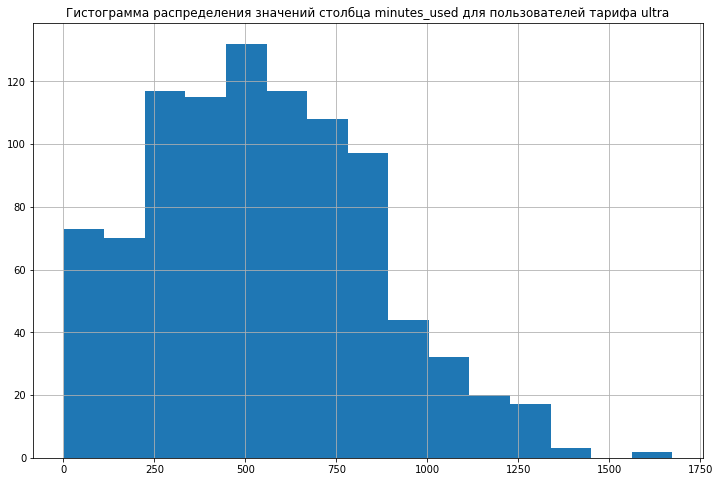



Расходование пользователями тарифа ultra по данным из столбца sms_used в месяц:

Описание столбца sms_used для пользователей тарифа ultra
count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: sms_used, dtype: float64

Дисперсия по выбранным данным равна 2109.66

Стандартное отклонение по выбранным данным равно 45.93

Среднее значение по выбранным данным равно 61.16

Медианное значение по выбранным данным равно 51.00



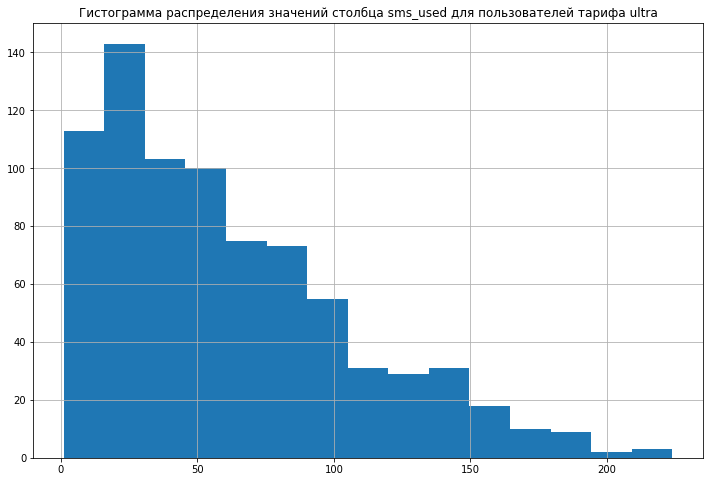



Расходование пользователями тарифа ultra по данным из столбца traffic_used в месяц:

Описание столбца traffic_used для пользователей тарифа ultra
count      974.000000
mean     19706.979466
std       9937.127298
min        366.000000
25%      12073.750000
50%      19427.500000
75%      26936.250000
max      49789.000000
Name: traffic_used, dtype: float64

Дисперсия по выбранным данным равна 98746498.93

Стандартное отклонение по выбранным данным равно 9937.13

Среднее значение по выбранным данным равно 19706.98

Медианное значение по выбранным данным равно 19427.50



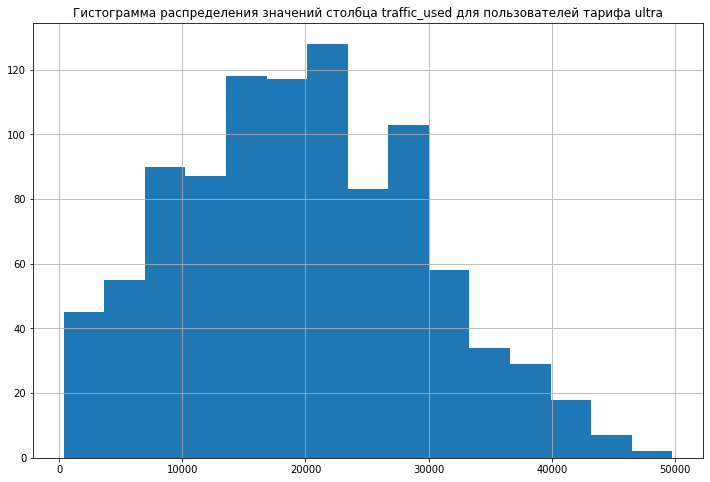



Расходование пользователями тарифа smart по данным из столбца minutes_used в месяц:

Описание столбца minutes_used для пользователей тарифа smart
count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: minutes_used, dtype: float64

Дисперсия по выбранным данным равна 35718.13

Стандартное отклонение по выбранным данным равно 188.99

Среднее значение по выбранным данным равно 419.44

Медианное значение по выбранным данным равно 423.00



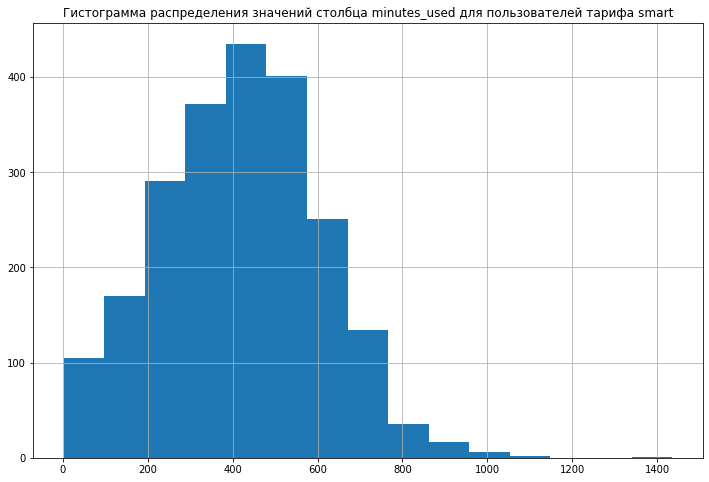



Расходование пользователями тарифа smart по данным из столбца sms_used в месяц:

Описание столбца sms_used для пользователей тарифа smart
count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: sms_used, dtype: float64

Дисперсия по выбранным данным равна 717.59

Стандартное отклонение по выбранным данным равно 26.79

Среднее значение по выбранным данным равно 38.72

Медианное значение по выбранным данным равно 34.00



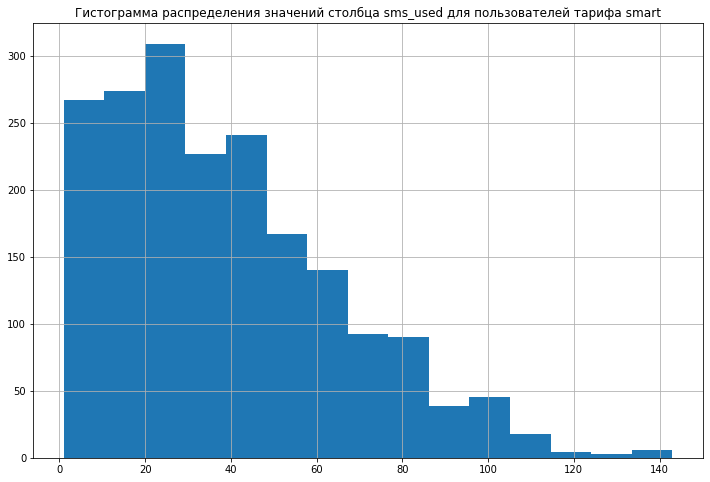



Расходование пользователями тарифа smart по данным из столбца traffic_used в месяц:

Описание столбца traffic_used для пользователей тарифа smart
count     2227.000000
mean     16243.763359
std       5860.041941
min        202.000000
25%      12677.000000
50%      16533.000000
75%      20068.000000
max      38610.000000
Name: traffic_used, dtype: float64

Дисперсия по выбранным данным равна 34340091.55

Стандартное отклонение по выбранным данным равно 5860.04

Среднее значение по выбранным данным равно 16243.76

Медианное значение по выбранным данным равно 16533.00



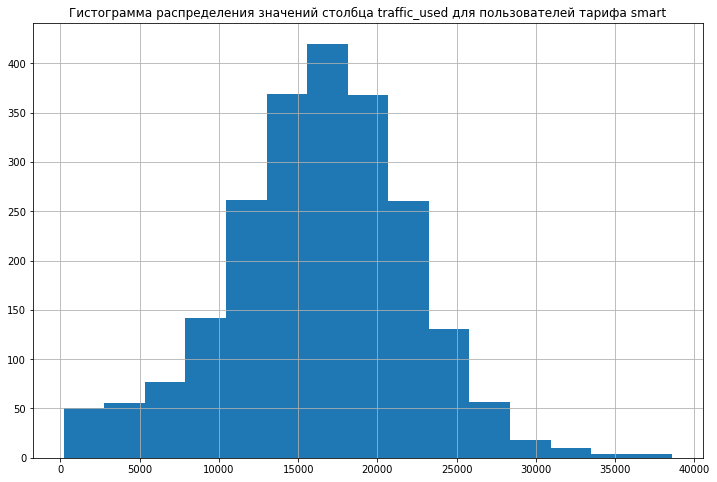

In [35]:
import matplotlib.pyplot as plt

tariff_list = ['ultra', 'smart']
sers = ['minutes_used', 'sms_used', 'traffic_used']


def describe_hist(tariff, ser):
    print()
    print('Расходование пользователями тарифа', tariff, 'по данным из столбца', ser, 'в месяц:')
    print()
    print('Описание столбца', ser, 'для пользователей тарифа', tariff)
    a = df[df['tariff'] == tariff][ser]
    print(a.describe())
    print()
    print('Дисперсия по выбранным данным равна {:.2f}'.format(np.var(a, ddof=1)))
    print()
    print('Стандартное отклонение по выбранным данным равно {:.2f}'.format(np.std(a, ddof=1)))
    print()
    print('Среднее значение по выбранным данным равно {:.2f}'.format(a.mean()))
    print()
    print('Медианное значение по выбранным данным равно {:.2f}'.format(a.median()))
    print()
    a.hist(bins=15, figsize=(12, 8))
    plt.title('Гистограмма распределения значений столбца {} для пользователей тарифа {}'.format(ser, tariff))
    plt.show()
    print()


for i in tariff_list:
    for j in sers:
        describe_hist(i, j)

Что мы видим:

Тариф "Ультра"
1. **Минуты** - распределение нормальное, хоть и есть незначительная скошенность вправо, из-за наличия большего наличия любителей поговорить, чем молчунов - последние тоже имеются.
2. **СМС** - распределение напоминает пуассоновское, выраженная отрицательная скошенность данных. В целом, люди редко пользуются СМС-сообщениями, из-за того, что есть  интернет. Но есть и гиперактивные ребята - таковых очень мало.
3. **Траффик** - распределение нормальное, межквартильный размах 12'073 - 26'936. То есть, в половине случаев, достаточный объем траффика от 12 до 26 ГБ и это входит в стоимость тарифа.

Тариф "Смарт"
1. **Минуты** - распределение нормальное. Оно ближе к нормальному, чем на тарифе "Ультра"
2. **СМС** - всё аналогично тарифу "Ультра", только люди используют СМС ещё меньше, возможно потому, что в сам тариф их входит меньше.
3. **Траффик** - самое нормальное распределение, судя по гистограмме, межквартильный размах ещё компактнее 12677 - 20068. Что означает от 12 до 20 ГБ, но в тариф входит только 15 ГБ.

Какой же тариф за прошедший год принёс больше денег оператору? Такого вопроса в описании к заданию нет. Но, всё-таки, посчитаем...

In [36]:
print('Доход с тарифа "Ультра" {:,}'.format(df[df['tariff'] == 'ultra']['total_income'].sum()))
print('Доход с тарифа "Смарт"  {:,}'.format(df[df['tariff'] == 'smart']['total_income'].sum()))

Доход с тарифа "Ультра" 2,040,000.0
Доход с тарифа "Смарт"  2,885,751.0


Это было ожидаемо.

## Шаг 4. Проверка гипотез

Необходимо проверить 2 гипотезы:

**1** - "Средняя выручка с пользователей разных тарифов различается".
Исходя из этого формируем гипотезу Hо, которая должна пердполагать равенство. То есть "Средняя выручка с пользователей разных тарифов не различается. Она примерно равна." Альтернативная, будет звучать наоборот. Так как было заявлено в описании.  
Импортируем статистическую библиотеку, чтобы проверить значения *p-value*.  
Нам надо составить 2 набора данных - для дохода полученного от пользователей тарифа "Ультра", и для доходов, полученных от пользователей тарифа "Смарт" и проверим, с какой вероятностью можно случайно встретить среднее значение для другого тарифа.  
Уровень значимости **alpha** оставим "*стандартный*" на оба случая. Я не такой эксперт, чтобы его настраивать.  
Для определения булева значения параметра `equal_var` для метода, который мы будем использовать, напишем функцию.  
Так же напишем функцию по проверке гипотез, чтобы не писать алгоритм заново.

In [37]:
from scipy import stats as st


def equal_var_bool(series1, series2):
    a = st.levene(series1, series2)
    if a.pvalue > 0.05:
        return False
    else:
        return True


def check_hip(massive1, massive2):
    result = st.ttest_ind(massive1, massive2, equal_var=equal_var_bool(massive1, massive2))
    print('p-значение равно: ', result.pvalue)
    if result.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получается отвергнуть нулевую гипотезу')

Функции описаны, проверим первую гипотезу.

In [38]:
income_ultra = df[df['tariff'] == 'ultra']['total_income']
income_smart = df[df['tariff'] == 'smart']['total_income']
alpha = 0.05

check_hip(income_smart, income_ultra)

p-значение равно:  2.7240946993530856e-246
Отвергаем нулевую гипотезу


У нас есть основание, чтобы отвергнуть нулевую гипотезу. То есть, с определенной уверенностью предполагать, что средние доходы получаемые от пользователей разных тарифов различаются. т.к. вероятность получить от пользователей тарифа "Смарт" средний доход, сопоставимый со средним доходом, получаемым от пользователя "Ультра" уверенно стремится к нулю.

То есть да, **средняя выручка для разных тарифов различается**.

Следующая гипотеза:  
**2** - "Средняя выручка c пользователей из Москвы отличается от выручки c пользователей из других регионов". Аналогично сформируем альтернатиную гипотезу Ho - "Средняя выручка с пользователей из Москвы не отличается от такой же по другим регионам".  
Так же как в прошлом случае сделаем выборку для  Москвы, и для данных по остальным городам.  
Поскольку у нас уже есть функция, мы просто вызовем её с нужными параметрами.

In [39]:
income_moscow = df[df['city'] == 'Москва']['total_income']
income_not_moscow = df[df['city'] != 'Москва']['total_income']
check_hip(income_not_moscow, income_moscow)

p-значение равно:  0.5126564657748214
Не получается отвергнуть нулевую гипотезу


То есть нет, **средняя выручка с пользователей из Москвы не отличается от выручки с пользователей других регионов**. 

Отвергнуть нулевую гипотезу у нас не получилось. С вероятностью в 51% можно случайно встретить те же цифры для Москвы, что и для других городов. Имеем основания предполагать, что выручка не отличается, или отличается несущественно.

## Шаг 5. Общий вывод

За время этой работы мы:  

Познакомились с данными.  

На этапе предобработки:

- удалили нулевые значения из столбцов с продолжительностью звонков и объёмом израсходованного траффика за сессию,

- округлили "вверх" продолжительность оставшихся звонков и мегабайт, как это делает оператор связи,

- исправили все даты, переведя их в формат даты вместо строк,

- выделили отдельно месяцы из дат,

- сделали сводные таблицы, сведя данные по пользователям и месяцам,

- соединили сведённые таблицы друг с другом по индексам, методом **merge**,

- получив агрегированные данные мы сбросили индексы методом **.reset_index()**, вернув колонки в таблицу,

- соединили таблицу с оставшимися через уникальные поля `user_id` и `tariff`,

- добавили новые колонки в таблицу через вычисления: `'over_mb'`, `'over_sms'`, `'over_minutes'`, `'total_income'`,

- и через функции одной строки: `'rub_traffic'`, `'rub_sms'`, `'rub_minutes'`.

На этапе анализа: 

Мы построили гистограммы распределения расходования звонков, смс-сообщений и интернета по месяцам. Посчитали дисперсию и стандртное отклонение, а так же среднее и медиану.  
Выяснилось, что пользователи тарифа "Ультра" в среднем больше говорят по телефону - 548 минут, против 419 для "Смарта". Скорее всего, по этой причине многие и купили тариф в который входит так много минут.  
СМС-сообщениями пользуются мало на обоих тарифах, но есть и активные СМСочники, их меньшинство. Половине пользователей тарифа "Ультра" достаточно 50 СМС. Но есть и люди, которые тратят более 150 СМС в месяц. На тарифе "Смарт" мксимально было отправлено 143 сообщения - но такие случаи, скорее, исключения. 75% пользователей тарифа не превышают отметку в 55 сообщений в месяц.  
В расходовании интернет-траффика, пользователи тарифа "Смарт" значительно чаще превышают предусмотренный лимит, чем пользователи тарифа "Ультра". Возможно, им его не хватает и есть смысл подумать над его увеличением, чтобы удержать клиентов.
75% пользователей тарифов "Смарт" и "Ультра" не превышают значений в 20 и 26 гигабайт соответственно, что не является большой разницей. Скорее всего, так происходит потому, что расходование траффика происходит "в одних и тех же местах". Те же сайты, социальные сети, видеохостинги. Но одни чувствуют себя там увереннее, так как им не нужно доплачивать за гигабайты.

Так же мы посчитали доход получаемый от пользователей каждого тарифа.  
Более чем на 800 тыс. руб. впереди оказался тариф "Смарт", несмотря на то, что он почти в 4 раза дешевле чем "Ультра".  
Рекомендую сделать упор именно на него, чтобы за счёт большого количества абонентов с избытком компенсировать его невысокую стоимость.

При проверке гипотез:

Гипотеза о том, что средняя выручка c пользователей из Москвы отличается от выручки c пользователей из других регионов, не подтвердилась.  
Гипотеза о том, что средняя выручка с пользователей разных тарифов различается, нашла подтверждение.